In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import mpld3
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

# Add this to python2 code to make life easier
from __future__ import absolute_import, division, print_function

In [2]:
dir = '~/InsightData/project/'
dir_sim = dir+'FEA_simulations/'
dir_print = dir+'post_built_data/'
dir_sensors = dir+'sensor_data/'

%cd ~/InsightData/project/

~/InsightData/project/


## Read the simulation dataset:

In [3]:
#pd.read_csv?
df = pd.read_csv('./FEA_simulations/data.csv', index_col=False, na_values='')
print(df.shape)
df.head()

(1889, 26)


,cooling_rate_avg-op_K_s^-1,inside_max_temp-op_K,laser_delivered_power_J_m^-2_s^-1,laser_diameter_mm,laser_distace_from_wire_mm,laser_max_temp-op_K,laser_power_w,left_wall_distance_mm,meltpool_length-op_m,meltpool_width-op_m,...,travel_speed_m_s^-1,wall_height_mm,wall_length_before_meltpool_mm,wall_length_mm,wire_angle_degree,wire_feed_speed_m_s^-1,wire_interface_liquid_fraction-op,wire_length_mm,wire_radius_mm,wire_temp_K
0,NaN,NaN,5.148396e+08,2.357018,0.009404,NaN,11226.315790,2.747193,NaN,NaN,...,0.044018,49.747368,5.307018,30.140351,23.147368,0.194245,NaN,14.771930,0.643395,390.000000
1,NaN,NaN,4.519838e+10,0.159825,0.010316,NaN,4531.578947,2.237719,NaN,NaN,...,0.052614,7.642105,4.257895,22.982456,17.905263,0.234736,NaN,16.238596,0.627897,550.000000
2,115131.41,5000.0,1.460452e+10,0.377368,0.010940,5978.6626,8163.157895,2.886140,0.004815,0.001933,...,0.060474,20.442105,11.054386,10.210526,25.357895,0.422865,0.045307,5.663158,0.605278,375.263158
3,NaN,NaN,1.254735e+08,3.085789,0.009495,NaN,4689.473684,2.797368,NaN,NaN,...,0.032965,13.368421,5.808772,30.842105,21.821053,0.312014,NaN,8.287719,0.593549,355.263158
4,NaN,NaN,4.635589e+09,0.453509,0.009221,NaN,3742.105263,2.052456,NaN,NaN,...,0.053842,34.252632,10.370175,37.157895,23.273684,0.385838,NaN,18.708772,0.538257,468.947368


## Reorganize the data
Separate the dataset into: input & output data

Rename the variables

In [4]:
for col in df.columns:
    if col=='cooling_rate_avg-op_K_s^-1':
        df.rename(columns={col:'cool_rate'}, inplace=True)
    if col=='inside_max_temp-op_K':
        df.rename(columns={col:'max_temp_inside'}, inplace=True)
    if col=='laser_delivered_power_J_m^-2_s^-1':
        df.rename(columns={col:'laser_power_rate'}, inplace=True)
    if col=='laser_diameter_mm':
        df.rename(columns={col:'laser_diameter'}, inplace=True)
    if col=='laser_distace_from_wire_mm':
        df.rename(columns={col:'laser-wire_dist'}, inplace=True)
    if col=='laser_max_temp-op_K':
        df.rename(columns={col:'max_temp_spot'}, inplace=True)
    if col=='laser_power_w':
        df.rename(columns={col:'laser_power'}, inplace=True)
    if col=='left_wall_distance_mm':
        df.rename(columns={col:'dist_left_wall'}, inplace=True)
    if col=='meltpool_length-op_m':
        df.rename(columns={col:'length_melt'}, inplace=True)
    if col=='meltpool_width-op_m':
        df.rename(columns={col:'width_melt'}, inplace=True)
    if col=='new_layer_height_mm':
        df.rename(columns={col:'height_new_layer'}, inplace=True)
    if col=='temp_after_meltpool_K':
        df.rename(columns={col:'temp_after'}, inplace=True)
    if col=='penetration-op_m':
        df.rename(columns={col:'penetration'}, inplace=True)
    if col=='right_wall_distance_mm':
        df.rename(columns={col:'dist_right_wall'}, inplace=True)
    if col=='temp_before_meltpool_K':
        df.rename(columns={col:'temp_before'}, inplace=True)
    if col=='time_s':
        df.rename(columns={col:'time'}, inplace=True)
    if col=='travel_speed_m_s^-1':
        df.rename(columns={col:'travel_speed'}, inplace=True)
    if col=='wall_height_mm':
        df.rename(columns={col:'wall_height'}, inplace=True)
    if col=='wall_length_before_meltpool_mm':
        df.rename(columns={col:'wall_length_before'}, inplace=True)
    if col=='wall_length_mm':
        df.rename(columns={col:'wall_length_after'}, inplace=True)
    if col=='wire_angle_degree':
        df.rename(columns={col:'wire_angle'}, inplace=True)
    if col=='wire_feed_speed_m_s^-1':
        df.rename(columns={col:'feed_speed'}, inplace=True)
    if col=='wire_interface_liquid_fraction-op':
        df.rename(columns={col:'fraction_wire_melt'}, inplace=True)
    if col=='wire_length_mm':
        df.rename(columns={col:'wire_length'}, inplace=True)
    if col=='wire_radius_mm':
        df.rename(columns={col:'wire_radius'}, inplace=True)
    if col=='wire_temp_K':
        df.rename(columns={col:'wire_temp'}, inplace=True)

df.head()

,cool_rate,max_temp_inside,laser_power_rate,laser_diameter,laser-wire_dist,max_temp_spot,laser_power,dist_left_wall,length_melt,width_melt,...,travel_speed,wall_height,wall_length_before,wall_length_after,wire_angle,feed_speed,fraction_wire_melt,wire_length,wire_radius,wire_temp
0,NaN,NaN,5.148396e+08,2.357018,0.009404,NaN,11226.315790,2.747193,NaN,NaN,...,0.044018,49.747368,5.307018,30.140351,23.147368,0.194245,NaN,14.771930,0.643395,390.000000
1,NaN,NaN,4.519838e+10,0.159825,0.010316,NaN,4531.578947,2.237719,NaN,NaN,...,0.052614,7.642105,4.257895,22.982456,17.905263,0.234736,NaN,16.238596,0.627897,550.000000
2,115131.41,5000.0,1.460452e+10,0.377368,0.010940,5978.6626,8163.157895,2.886140,0.004815,0.001933,...,0.060474,20.442105,11.054386,10.210526,25.357895,0.422865,0.045307,5.663158,0.605278,375.263158
3,NaN,NaN,1.254735e+08,3.085789,0.009495,NaN,4689.473684,2.797368,NaN,NaN,...,0.032965,13.368421,5.808772,30.842105,21.821053,0.312014,NaN,8.287719,0.593549,355.263158
4,NaN,NaN,4.635589e+09,0.453509,0.009221,NaN,3742.105263,2.052456,NaN,NaN,...,0.053842,34.252632,10.370175,37.157895,23.273684,0.385838,NaN,18.708772,0.538257,468.947368


In [5]:
cols_in = ['time', 'laser_power', 'laser_power_rate', 'laser_diameter', 'laser-wire_dist', 'dist_left_wall', 
           'dist_right_wall', 'height_new_layer', 'temp_after', 'wall_length_before', 'wall_length_after', 
           'wire_length', 'wire_radius', 'wire_temp', 'temp_before', 'travel_speed', 'wall_height', 'wire_angle', 
           'feed_speed']

cols_out = ['cool_rate', 'max_temp_inside', 'max_temp_spot', 'length_melt', 'width_melt', 'penetration', 
            'fraction_wire_melt']

df_out = df[cols_out]
df_in = df[cols_in]

print('Useful data %:', df['cool_rate'].dropna().count()/df['time'].count())

df_out.head(3)
#df_out.tail(3)

Useful data %: 0.518263631551


,cool_rate,max_temp_inside,max_temp_spot,length_melt,width_melt,penetration,fraction_wire_melt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115131.41,5000.0,5978.6626,0.004815,0.001933,0.000879,0.045307


## Discard the outliers in the variables:

Total # datapoints:  1889 ; Discading NaNs:  979 ; Selecting realistinc values: 855

feed_speed


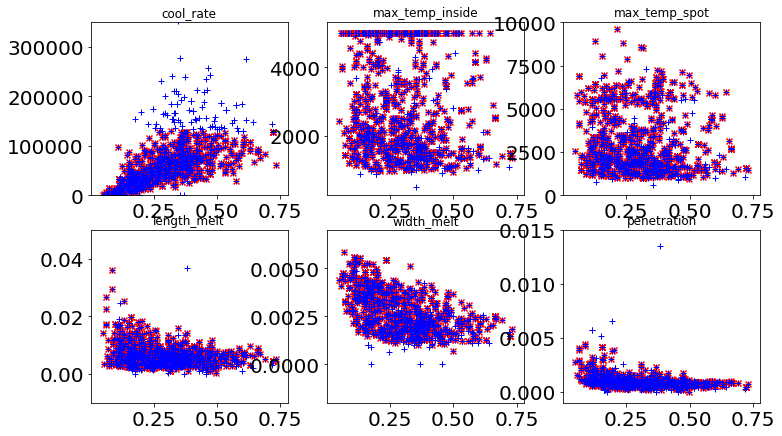

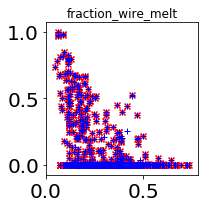

In [6]:
plt.close('all')
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(12,7))
fig, ax = plt.subplots(figsize=(3,3))

df_sel = df[(df['cool_rate'] <  1.3e5) & (df['max_temp_spot'] < 8.0e4) & (df['penetration'] < 0.005) & 
            (df['length_melt'] > -1e20) & (df['length_melt'] < 1e20) & (df['width_melt'] > 0)]
print('Total # datapoints: ', df['time'].count(), '; Discading NaNs: ', df['cool_rate'].dropna().count(), 
      '; Selecting realistinc values:', df_sel['time'].count())
print('')

n = 18
print(df_in.columns[n])
ax1.plot(df[cols_in[n]], df[cols_out[0]],'+',color='blue')
ax1.set_title(cols_out[0])
ax1.set_ylim([0,3.5e5])
ax1.scatter(df_sel[cols_in[n]], df_sel[cols_out[0]], marker='x',color='red')
ax2.plot(df[cols_in[n]], df[cols_out[1]],'+',color='blue')
ax2.set_title(cols_out[1])
ax2.scatter(df_sel[cols_in[n]], df_sel[cols_out[1]], marker='x',color='red')
ax3.plot(df[cols_in[n]], df[cols_out[2]],'+',color='blue')
ax3.set_title(cols_out[2])
ax3.set_ylim([0,1e4])
ax3.scatter(df_sel[cols_in[n]], df_sel[cols_out[2]], marker='x',color='red')
ax4.plot(df[cols_in[n]], df[cols_out[3]],'+',color='blue')
ax4.set_title(cols_out[3])
ax4.set_ylim([-0.01,0.05])
ax4.scatter(df_sel[cols_in[n]], df_sel[cols_out[3]], marker='x',color='red')
ax5.plot(df[cols_in[n]], df[cols_out[4]],'+',color='blue')
ax5.set_title(cols_out[4])
ax5.set_ylim([-2e-3,7e-3])
ax5.scatter(df_sel[cols_in[n]], df_sel[cols_out[4]], marker='x',color='red')
ax6.plot(df[cols_in[n]], df[cols_out[5]],'+',color='blue')
ax6.set_title(cols_out[5])
ax6.scatter(df_sel[cols_in[n]], df_sel[cols_out[5]], marker='x',color='red')
ax6.set_ylim([-1e-3,1.5e-2])
ax.plot(df[cols_in[n]], df[cols_out[6]],'+',color='blue')
ax.set_title(cols_out[6])
ax.scatter(df_sel[cols_in[n]], df_sel[cols_out[6]], marker='x',color='red')

plt.tight_layout()
plt.show(fig)
plt.close('all')


## Select the Useful Data:

In [7]:
df_sel = df[(df['cool_rate'] <  1.3e5) & (df['max_temp_spot'] < 8.0e4) & (df['penetration'] < 0.005) & 
            (df['length_melt'] > -1e20) & (df['length_melt'] < 1e20) & (df['width_melt'] > 0) & 
            (df['length_melt'] > 0) & (df['penetration'] > 0)]
df_sel = df_sel.dropna()
print('Total # useful data:', df_sel['time'].count(), '; % Useful data:', df_sel['time'].count()/df['time'].count())

df_sel.head()

Total # useful data: 855 ; % Useful data: 0.452620434092


,cool_rate,max_temp_inside,laser_power_rate,laser_diameter,laser-wire_dist,max_temp_spot,laser_power,dist_left_wall,length_melt,width_melt,...,travel_speed,wall_height,wall_length_before,wall_length_after,wire_angle,feed_speed,fraction_wire_melt,wire_length,wire_radius,wire_temp
2,115131.410,5000.0000,1.460452e+10,0.377368,0.010940,5978.6626,8163.157895,2.886140,0.004815,0.001933,...,0.060474,20.442105,11.054386,10.210526,25.357895,0.422865,0.045307,5.663158,0.605278,375.263158
8,38648.191,1849.2128,5.354498e+08,2.204737,0.010947,1974.2283,10215.789470,2.716316,0.009671,0.003454,...,0.045246,16.400000,10.142105,10.631579,13.105263,0.411081,0.000000,10.371930,0.544540,453.157895
12,83318.891,5000.0000,1.023008e+10,0.486140,0.009347,5919.9004,9489.473684,2.500175,0.006670,0.002028,...,0.063175,4.442105,2.661404,19.614035,24.221053,0.373170,0.000000,6.280702,0.584334,501.578947
18,117957.950,1511.7866,6.401692e+08,1.388947,0.010232,1637.6294,4847.368421,2.434561,0.003647,0.001262,...,0.069070,19.600000,12.787719,11.614035,13.863158,0.382811,0.000000,7.592982,0.560877,543.684211
35,12885.079,3219.1543,1.782306e+09,0.790702,0.009312,3386.0747,4373.684211,2.855263,0.003770,0.002355,...,0.019211,21.452632,5.352632,17.508772,15.631579,0.117849,0.330994,19.326316,0.563809,462.631579


## Separate the whole dataset into Training and Test subsets:

In [8]:
from sklearn.model_selection import train_test_split

## Separate the dataset into a 85% training and 15% test (will not touch for final validation):
df_Train = df_sel.sample(frac=0.85)
df_Test = df_sel.loc[~df_sel.index.isin(df_Train.index)]

## Separate the dataset into a 85% training and 15% test (will not touch for final validation):
df_X_Train, df_X_Test, df_y_Train, df_y_Test = train_test_split(df_sel[cols_in], df_sel[cols_out],
                                                                test_size=0.15, random_state=1)
print(df_X_Train.shape, df_y_Train.shape, df_X_Test.shape, df_y_Test.shape)
df_sel.head()

(726, 19) (726, 7) (129, 19) (129, 7)


,cool_rate,max_temp_inside,laser_power_rate,laser_diameter,laser-wire_dist,max_temp_spot,laser_power,dist_left_wall,length_melt,width_melt,...,travel_speed,wall_height,wall_length_before,wall_length_after,wire_angle,feed_speed,fraction_wire_melt,wire_length,wire_radius,wire_temp
2,115131.410,5000.0000,1.460452e+10,0.377368,0.010940,5978.6626,8163.157895,2.886140,0.004815,0.001933,...,0.060474,20.442105,11.054386,10.210526,25.357895,0.422865,0.045307,5.663158,0.605278,375.263158
8,38648.191,1849.2128,5.354498e+08,2.204737,0.010947,1974.2283,10215.789470,2.716316,0.009671,0.003454,...,0.045246,16.400000,10.142105,10.631579,13.105263,0.411081,0.000000,10.371930,0.544540,453.157895
12,83318.891,5000.0000,1.023008e+10,0.486140,0.009347,5919.9004,9489.473684,2.500175,0.006670,0.002028,...,0.063175,4.442105,2.661404,19.614035,24.221053,0.373170,0.000000,6.280702,0.584334,501.578947
18,117957.950,1511.7866,6.401692e+08,1.388947,0.010232,1637.6294,4847.368421,2.434561,0.003647,0.001262,...,0.069070,19.600000,12.787719,11.614035,13.863158,0.382811,0.000000,7.592982,0.560877,543.684211
35,12885.079,3219.1543,1.782306e+09,0.790702,0.009312,3386.0747,4373.684211,2.855263,0.003770,0.002355,...,0.019211,21.452632,5.352632,17.508772,15.631579,0.117849,0.330994,19.326316,0.563809,462.631579


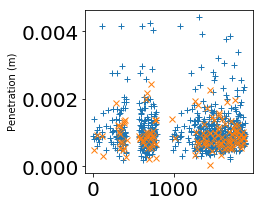

In [9]:
## Plot test and train subset values:
plt.close('all')
fig, ax = plt.subplots(figsize=(3,3))

ax.plot(df_y_Train['penetration'], '+')
ax.plot(df_y_Test['penetration'], 'x')
plt.ylabel('Penetration (m)')
plt.show(fig)
plt.close('all')

### Scatter plots:
Focus on the "penetration" variable and visually check how does it behave in relation to the 19 input variables:

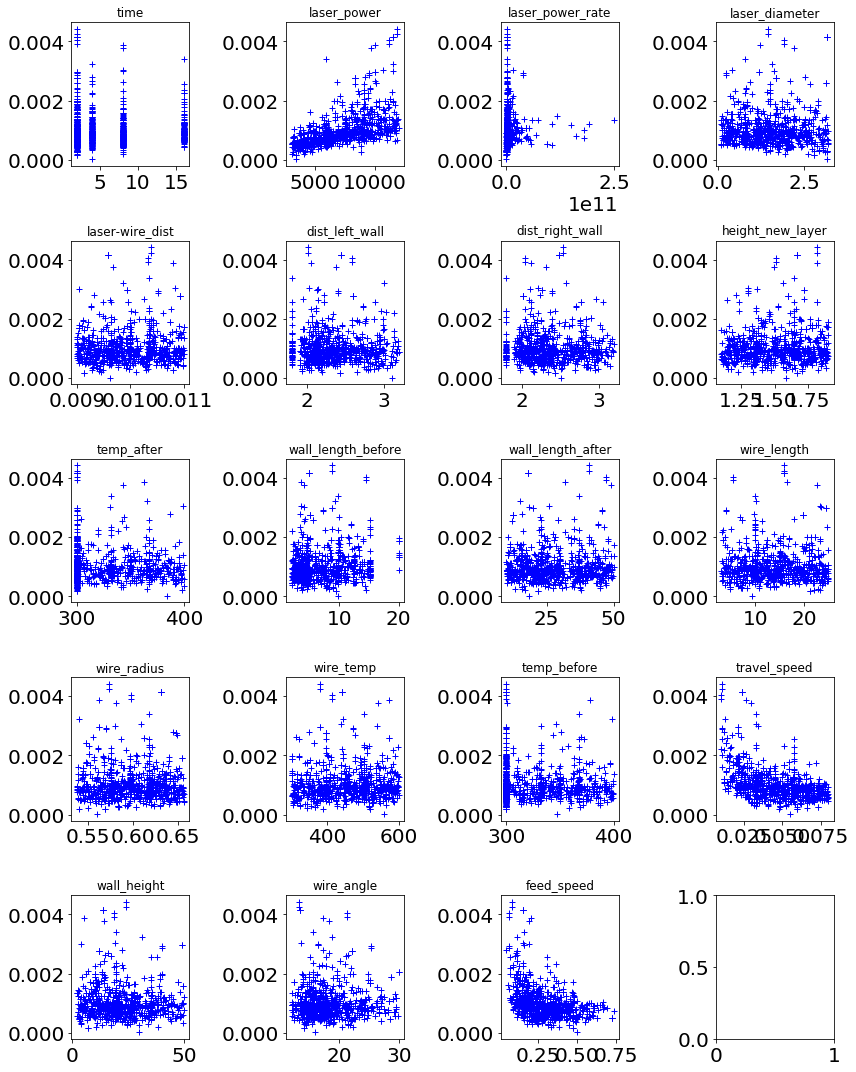

In [10]:
## Plot test subset vs predicted values:
plt.close('all')
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12),
     (ax13, ax14, ax15, ax16), (ax17, ax18, ax19, ax20)) = plt.subplots(5,4,figsize=(12,15))

ax1.plot(df_sel[cols_in[0]], df_sel['penetration'],'+',color='blue')
ax1.set_title(cols_in[0])
ax2.plot(df_sel[cols_in[1]], df_sel['penetration'],'+',color='blue')
ax2.set_title(cols_in[1])
ax3.plot(df_sel[cols_in[2]], df_sel['penetration'],'+',color='blue')
ax3.set_title(cols_in[2])
ax4.plot(df_sel[cols_in[3]], df_sel['penetration'],'+',color='blue')
ax4.set_title(cols_in[3])
ax5.plot(df_sel[cols_in[4]], df_sel['penetration'],'+',color='blue')
ax5.set_title(cols_in[4])
ax6.plot(df_sel[cols_in[5]], df_sel['penetration'],'+',color='blue')
ax6.set_title(cols_in[5])
ax7.plot(df_sel[cols_in[6]], df_sel['penetration'],'+',color='blue')
ax7.set_title(cols_in[6])
ax8.plot(df_sel[cols_in[7]], df_sel['penetration'],'+',color='blue')
ax8.set_title(cols_in[7])
ax9.plot(df_sel[cols_in[8]], df_sel['penetration'],'+',color='blue')
ax9.set_title(cols_in[8])
ax10.plot(df_sel[cols_in[9]], df_sel['penetration'],'+',color='blue')
ax10.set_title(cols_in[9])
ax11.plot(df_sel[cols_in[10]], df_sel['penetration'],'+',color='blue')
ax11.set_title(cols_in[10])
ax12.plot(df_sel[cols_in[11]], df_sel['penetration'],'+',color='blue')
ax12.set_title(cols_in[11])
ax13.plot(df_sel[cols_in[12]], df_sel['penetration'],'+',color='blue')
ax13.set_title(cols_in[12])
ax14.plot(df_sel[cols_in[13]], df_sel['penetration'],'+',color='blue')
ax14.set_title(cols_in[13])
ax15.plot(df_sel[cols_in[14]], df_sel['penetration'],'+',color='blue')
ax15.set_title(cols_in[14])
ax16.plot(df_sel[cols_in[15]], df_sel['penetration'],'+',color='blue')
ax16.set_title(cols_in[15])
ax17.plot(df_sel[cols_in[16]], df_sel['penetration'],'+',color='blue')
ax17.set_title(cols_in[16])
ax18.plot(df_sel[cols_in[17]], df_sel['penetration'],'+',color='blue')
ax18.set_title(cols_in[17])
ax19.plot(df_sel[cols_in[18]], df_sel['penetration'],'+',color='blue')
ax19.set_title(cols_in[18])

plt.tight_layout()
plt.show(fig)
plt.close('all')

#fig.savefig('penetration_variation.jpg')

## Normalize the dataset:

Normalize the dataset such that the median in 0.0 and the variance is 1.0

Use the same noramalization method for all data

In [11]:
def normalize(data):
    """ Given the flare data, we normalize each feature by subtrating the median and 
    dividing by the standard deviation of each feature. """
    data = np.array(data)
    n_elements, n_features = data.shape
    for j in range(n_features):
        standard_deviation_of_this_feature = np.std(data[:,j])
        median_of_this_feature = np.median(data[:,j])
        for i in range(n_elements):
            data[i,j] = (data[i,j] - median_of_this_feature) / (standard_deviation_of_this_feature)
    return data

In [12]:
X_std = normalize(df_sel[cols_in])
y_std = normalize(df_sel[cols_out])
df_X_std = pd.DataFrame(data=X_std, columns=cols_in)
df_y_std = pd.DataFrame(data=y_std, columns=cols_out)

df_X_std_Train, df_X_std_Test, df_y_std_Train, df_y_std_Test = train_test_split(df_X_std[cols_in],df_y_std[cols_out],
                                                                                test_size=0.15, random_state=1)

df_Train_std = pd.concat([df_X_std_Train, df_y_std_Train], axis=1)
df_Test_std = pd.concat([df_X_std_Test, df_y_std_Test], axis=1)
df_Train_std.head(3)

,time,laser_power,laser_power_rate,laser_diameter,laser-wire_dist,dist_left_wall,dist_right_wall,height_new_layer,temp_after,wall_length_before,...,wall_height,wire_angle,feed_speed,cool_rate,max_temp_inside,max_temp_spot,length_melt,width_melt,penetration,fraction_wire_melt
590,0.851184,-0.243750,2.424752,-1.624135,0.372125,-0.194058,-0.381599,-0.728546,2.720271,-0.902915,...,-0.368476,-0.793263,-0.037321,1.373217,1.973915,2.382809,-0.442199,-0.752806,-0.144702,0.0
600,0.851184,1.119136,0.014299,0.036580,0.707040,0.220520,-0.169118,-1.092819,2.566707,-0.989047,...,-0.352456,1.780005,0.488262,0.083799,-0.076423,0.067196,0.301559,-0.660190,-0.252419,0.0
16,-0.425592,0.795310,-0.028476,1.940589,0.148850,1.197824,-0.735381,0.726915,-0.148079,1.602965,...,1.078170,-0.941367,0.100195,-0.225216,-0.704399,-0.591963,0.497839,0.135916,0.195720,0.0


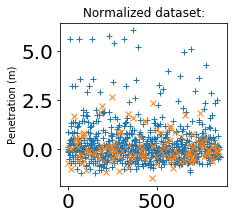

In [13]:
## Plot test and train subset values:
plt.close('all')
fig, ax = plt.subplots(figsize=(3,3))
s = 5
ax.plot(df_Train_std['penetration'], '+')
ax.plot(df_Test_std['penetration'], 'x')
plt.ylabel("Penetration (m)")
plt.title('Normalized dataset:')
plt.show(fig)
plt.close('all')

## ANOVA F-scores:

To investigate the importance of each input variable and apply an univariate feature selection, I calculate the ANOVA F-scores for each feature. 

These F-scores can quantify the impact of each feature: it measures the difference between the distribution of the values by taking into account each distribution's mean and variance.

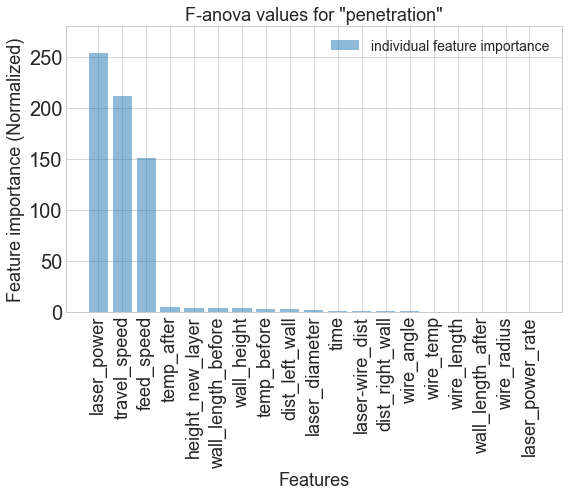

In [14]:
from sklearn.feature_selection import f_regression

F_anova_fit = f_regression(df_X_std_Train, df_y_std_Train['penetration'], center=True)
F_anova_val = F_anova_fit[0]
p_val = F_anova_fit[1]

idx = sorted(range(len(F_anova_val)), key=lambda x:F_anova_val[x], reverse=True)
F_anova_ord = F_anova_val[idx]
cols_sorted_Fanova = np.array(cols_in)[idx]

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(8,7))
    
    plt.bar(range(len(F_anova_val)), F_anova_val[idx], alpha=0.5, align='center', label='individual feature importance')
    plt.xticks(range(len(F_anova_val)), cols_sorted_Fanova, rotation='vertical', fontsize=18)
    plt.title('F-anova values for "penetration"', fontsize=18)
    plt.ylabel('Feature importance (Normalized)', fontsize=18)
    plt.xlabel('Features', fontsize=18)
    plt.ylim((0,2.8e2))
    plt.legend(loc='best', fontsize=14)
    plt.tight_layout()
    plt.show()
    #fig.savefig('F_anova_penetration.jpg')

## Separate the dataset into training and test data:

## K-fold cross validation:

Apply it into the already normalized input dataset
and let's try with the real output value units:

In [15]:
from sklearn.model_selection import KFold

k=5
kf = KFold(n_splits=k)
Folds_kf = kf.split(df_X_Train)
Folds_kf_std = kf.split(df_Train_std)

## Separate the dataset into training and test subsets:
for train, test in Folds_kf:
    print("%s %s" % (train, test))
    X_train = df_X_Train.iloc[train]
    y_train = df_y_Train.iloc[train]
    X_test = df_X_Train.iloc[test]
    y_test = df_y_Train.iloc[test]

for train_std, test_std in Folds_kf_std:
    print("%s %s" % (train_std, test_std))
    X_train_std = df_X_std_Train.iloc[train_std]
    y_train_std = df_y_std_Train.iloc[train_std]
    X_test_std = df_X_std_Train.iloc[test_std]
    y_test_std = df_y_std_Train.iloc[test_std]

print('% of training:', X_train['time'].count()/df_X_Train['time'].count(), 
      '% of test:', X_test['time'].count()/df_X_Train['time'].count())


[146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 39

## Tree Decision Regressor

Use Tree Decision Regressor to model the "penetration" based on the input variables normalized (the output variables will not be normalized):

In [16]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import chisquare
import pydot
from sklearn.externals.six import StringIO

cols = ['travel_speed', 'feed_speed', 'laser_power', 'wire_angle', 'laser-wire_dist', 'laser_diameter', 'wire_length', 
        'dist_right_wall', 'dist_left_wall', 'laser_power_rate', 'wall_height', 'wire_radius', 'height_new_layer',
        'temp_before', 'temp_after', 'wall_length_before', 'wall_length_after', 'wire_temp', 'time']

cols = cols_in

d=14
s=2
tree = DecisionTreeRegressor(max_depth=d, min_samples_split=s, random_state=0)

y = y_train['penetration']
y_test_penetration = y_test['penetration']
y_Test_penetration = df_y_Test['penetration']

t=13
X_n = X_train_std[cols[0:t]]
X_test_n = X_test_std[cols[0:t]]
X_Test_std = df_X_std_Test[cols[0:t]]

model_tree = tree.fit(X_n, y)
y_pred_tree_train = model_tree.predict(X_n)
y_pred_tree_test = model_tree.predict(X_test_n)
y_pred_tree_Test = model_tree.predict(X_Test_std)

sqr_train_tree = mean_squared_error(y, y_pred_tree_train)
sqr_test_tree = mean_squared_error(y_test_penetration, y_pred_tree_test)
sqr_Test_tree = mean_squared_error(y_Test_penetration, y_pred_tree_Test)

resid_train_tree = y_pred_tree_train - y
resid_test_tree = y_pred_tree_test - y_test_penetration
resid_Test_tree = y_pred_tree_Test - y_Test_penetration

R2_tree_train = r2_score(y, y_pred_tree_train)
R2_tree_test = r2_score(y_test_penetration, y_pred_tree_test)
R2_tree_Test = r2_score(y_Test_penetration, y_pred_tree_Test)

print('R^2 score for "penetration" analysis and', d, 'depths and', t, 'parameters:', R2_tree_train)
print('R^2 score resulting from comparing y-predicted with y-test:', R2_tree_test)
print('R^2 score resulting from comparing y-Predicted with y-validation:', R2_tree_Test) #-0.512489507609

R^2 score for "penetration" analysis and 14 depths and 13 parameters: 0.814733636695
R^2 score resulting from comparing y-predicted with y-test: 0.22624120262
R^2 score resulting from comparing y-Predicted with y-validation: -0.512489507609


Once we have the optimal input variables, let's build the model and test it on the "Test" datasets:

In [17]:
## Build a proper model based on the optimal input variables:
y = y_train['penetration']
y_test_penetration = y_test['penetration']
y_Test_penetration = df_y_Test['penetration']

d=7
s=2
tree = DecisionTreeRegressor(max_depth=d, min_samples_split=s, random_state=0)

r=16
X_n = X_train_std[cols[0:r]]
X_test_n = X_test_std[cols[0:r]]
X_Test_std = df_X_std_Test[cols[0:r]]

## Fit/train regression model:
model_tree = tree.fit(X_n, y)
print('R^2 score for "penetration" analysis, considering', n, 'estimators', t, 'parameters and', r, 'variables:')
print(model_tree.score(X_n, y))

## Obtain predicted value, based on the K-fold test values
y_pred_tree = model_tree.predict(X_test_n)
## Estimate accuracy based on y-real vs y-predicted (K-fold):
R2_tree_test = r2_score(y_test_penetration, y_pred_tree)
chi2_tree_test = chisquare(y_pred_tree, f_exp=y_test_penetration)
print('R^2 resulting from comparing y-predicted with y-test from K-fold:', (R2_tree_test))
#print('Chi^2 resulting from comparing y-predicted with y-test from K-fold:', (chi2_tree_test))

## Obtain predicted value, based on the Test subset values
Predicted_Test_tree = model_tree.predict(X_Test_std)

## Estimate accuracy based on y-real vs y-predicted:
R2_tree_Test = r2_score(y_Test_penetration, Predicted_Test_tree)
chi2_tree_Test = chisquare(Predicted_Test_tree, f_exp=y_Test_penetration)
print('R^2 resulting from comparing y-predicted with y-test from Test subset:', (R2_tree_Test)) #0.615644933343
#print('Chi^2 resulting from comparing y-predicted with y-test from Test subset:', (chi2_tree_Test))

R^2 score for "penetration" analysis, considering 18 estimators 13 parameters and 16 variables:
0.847188042624
R^2 resulting from comparing y-predicted with y-test from K-fold: 0.392337222372
R^2 resulting from comparing y-predicted with y-test from Test subset: 0.615644933343


#### Performance Tree Decision Regressor Model:
Plotting the y_test of K-fold vs the predicted one
and the y-Test of the subset vs the predicted one:

% of Training within tolerance 0.898450946644
% of test within tolerance 0.8
% of Test within tolerance 0.860465116279


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


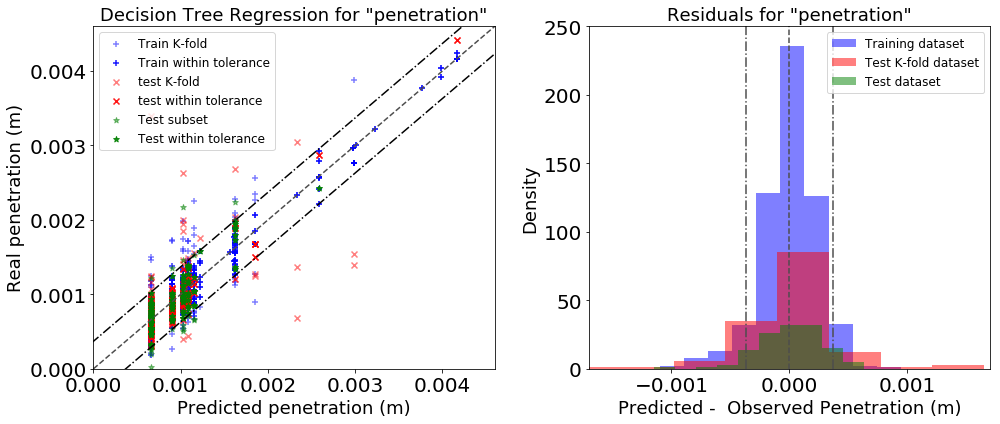

In [22]:
from sklearn.metrics import mean_squared_error
import matplotlib.cm as cm

y = y_train['penetration']
y_test_penetration = y_test['penetration']
y_Test_penetration = df_y_Test['penetration']

d=7
s=2
#tree = DecisionTreeRegressor(random_state=0)
tree = DecisionTreeRegressor(max_depth=d, min_samples_split=s, random_state=0)

r=16
X_n = X_train_std[cols[0:r]]
X_test_n = X_test_std[cols[0:r]]
X_Test_std = df_X_std_Test[cols[0:r]]

y_pred_train = model_tree.predict(X_n)
y_pred_test = model_tree.predict(X_test_n)
y_pred_Test = model_tree.predict(X_Test_std)

sqr_train = mean_squared_error(y, y_pred_train)
sqr_test = mean_squared_error(y_test_penetration, y_pred_test)
sqr_Test = mean_squared_error(y_Test_penetration, y_pred_Test)

resid_train = y_pred_train - y
resid_test = y_pred_test - y_test_penetration
resid_Test = y_pred_Test - y_Test_penetration

#print('Mean residuals train set:', np.mean(resid_train))
#print('Mean residuals test K-fold set:', np.mean(resid_test))
#print('Mean residuals Test set:', np.mean(resid_Test))

tolerance = 3.7e-4
diag = np.array([df_sel['penetration'].min(), df_sel['penetration'].max()])
bins = np.linspace(-3e-3, 3e-3, 20)
pp_train = abs(resid_train) < tolerance
pp_test = abs(resid_test) < tolerance
pp_Test = abs(resid_Test) < tolerance

print('% of Training within tolerance', pp_train[pp_train].count()/y.count())
print('% of test within tolerance', pp_test[pp_test].count()/y_test_penetration.count())
print('% of Test within tolerance', pp_Test[pp_Test].count()/y_Test_penetration.count())

plt.close('all')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,6))

ax1.scatter(y_pred_train, y, marker='+', color='blue', alpha=0.5, label='Train K-fold')
ax1.scatter(y_pred_train[pp_train], y[pp_train], marker='+', color='blue', alpha=0.9, 
            label='Train within tolerance')
ax1.scatter(y_pred_test, y_test_penetration, marker='x', color='red', alpha=0.5, label='test K-fold')
ax1.scatter(y_pred_test[pp_test], y_test_penetration[pp_test], marker='x', color='red', alpha=0.9, 
            label='test within tolerance')
ax1.scatter(y_pred_Test, y_Test_penetration, marker='*', color='green', alpha=0.5, label='Test subset')
ax1.scatter(y_pred_Test[pp_Test], y_Test_penetration[pp_Test], marker='*', color='green', alpha=0.9, 
            label='Test within tolerance')
ax1.plot([-0, 1], [-0, 1], ls="--", c=".3")
ax1.plot(diag-tolerance/2., diag+tolerance/2., ls="-.", c=".3", color='k')
ax1.plot(diag+tolerance/2., diag-tolerance/2., ls="-.", c=".3", color='k')
ax1.set_xlabel('Predicted penetration (m)', fontsize=18)
ax1.set_ylabel('Real penetration (m)', fontsize=18)
ax1.set_title('Decision Tree Regression for "penetration"', fontsize=18)
ax1.set_xlim(0, 4.6e-3)
ax1.set_ylim(0, 4.6e-3)
ax1.legend(loc='best', fontsize=12)

ax2.hist(resid_train, color='blue', alpha=0.5, label='Training dataset', normed=False)
ax2.hist(resid_test, color='red', alpha=0.5, label='Test K-fold dataset', normed=False)
ax2.hist(resid_Test, color='green', alpha=0.5, label='Test dataset', normed=False)
ax2.plot([-0, 0], [-0, 500], ls="--", c=".3")
ax2.plot([-tolerance, -tolerance], [-0, 500], ls="-.", c=".3")
ax2.plot([tolerance, tolerance], [-0, 500], ls="-.", c=".3")
ax2.set_title('Residuals for "penetration"', fontsize=18)
ax2.set_ylabel('Density', fontsize=18)
ax2.set_xlabel('Predicted -  Observed Penetration (m)', fontsize=18)
ax2.set_ylim((0,250))
ax2.set_xlim(-1.7e-3, 1.7e-3)
ax2.legend(loc='best', fontsize=12)

plt.tight_layout()
plt.show()
plt.close('all')

#fig.savefig('TreeDecision_penetration_predicted_residuals_all.jpg')

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


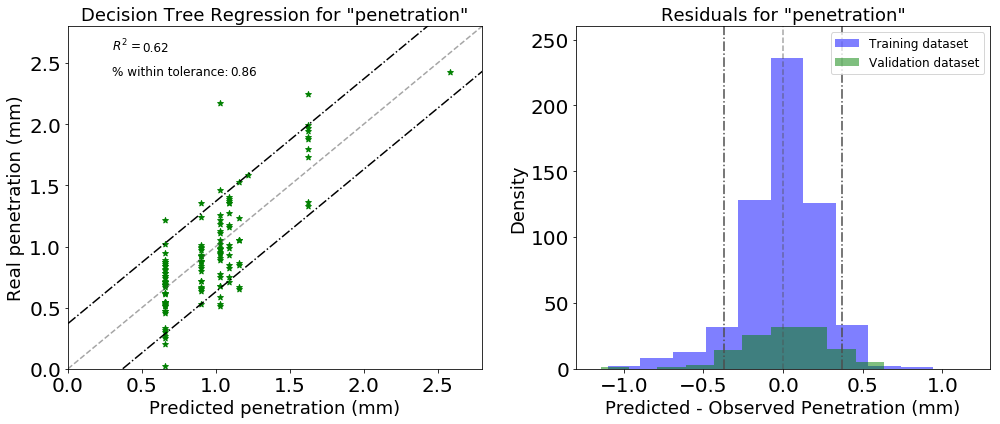

In [23]:
perc =  pp_Test[pp_Test].count()/y_Test_penetration.count()

plt.close('all')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,6))

ax1.scatter(y_pred_Test*1e3, y_Test_penetration*1e3, marker='*', color='green', label='Validation subset')
ax1.plot([-0, 10], [-0, 10], ls="--", c=".3", alpha=0.5)
ax1.plot((diag-tolerance/2.)*1e3, (diag+tolerance/2.)*1e3, ls="-.", c=".3", color='k')
ax1.plot((diag+tolerance/2.)*1e3, (diag-tolerance/2.)*1e3, ls="-.", c=".3", color='k')
ax1.set_xlabel('Predicted penetration (mm)', fontsize=18)
ax1.set_ylabel('Real penetration (mm)', fontsize=18)
ax1.set_title('Decision Tree Regression for "penetration"', fontsize=18)
ax1.set_xlim(0, 2.8)
ax1.set_ylim(0, 2.8)
ax1.text(0.0003*1e3, 0.0024*1e3, '% within tolerance:', fontsize=12)
ax1.text(0.0011*1e3, 0.0024*1e3, str('{:04.2f}'.format(perc)), fontsize=12)
ax1.text(0.0003*1e3, 0.0026*1e3, '$R^2$ = ', fontsize=12)
ax1.text(0.0005*1e3, 0.0026*1e3,'{:04.2f}'.format(R2_tree_Test), fontsize=12)

ax2.hist(resid_train*1e3, color='blue', alpha=0.5, label='Training dataset', normed=False)
ax2.hist(resid_Test*1e3, color='green', alpha=0.5, label='Validation dataset', normed=False)
ax2.plot([-0, 0], [-0, 500], ls="--", c=".3", alpha=0.5)
ax2.plot([-tolerance*1e3, -tolerance*1e3], [-0, 500], ls="-.", c=".3")
ax2.plot([tolerance*1e3, tolerance*1e3], [-0, 500], ls="-.", c=".3")
ax2.set_title('Residuals for "penetration"', fontsize=18)
ax2.set_ylabel('Density', fontsize=18)
ax2.set_xlabel('Predicted - Observed Penetration (mm)', fontsize=18)
ax2.set_ylim((0,260))
ax2.set_xlim(-1.3, 1.3)
ax2.legend(loc='best', fontsize=12)

plt.tight_layout()
plt.show()
plt.close('all')

#fig.savefig('TreeDecision_penetration_predicted_residuals.jpg')